In [33]:
import re
from pathlib import Path
from pptx import Presentation
from markitdown import MarkItDown
from IPython.display import Image, display

In [34]:
root_dir = Path.cwd().parents[0]
pptx_path = root_dir / "tests" / "data" / "dummy_slide.pptx"
print(pptx_path)

c:\Users\kitano\RuleCheck\backend\tests\data\dummy_slide.pptx


In [43]:
prs = Presentation(pptx_path)
slide_texts = []
for idx, slide in enumerate(prs.slides, 1):
    rows = [f"<!-- Slide number: {idx} -->"]
    for shape in slide.shapes:
        if shape.name.lower().startswith("title") and hasattr(shape, "text"):
            rows.append(f"# {shape.text.strip()}")
        if hasattr(shape, "text_frame"):
            for p in shape.text_frame.paragraphs:
                text = "".join(r.text for r in p.runs).strip()
                if not text:
                    continue
                indent = "  " * p.level
                bullet = "- " if p.level else ""
                rows.append(f"{indent}{bullet}{text}")
    slide_texts.append("\n".join(rows))

text_content = "\n".join(slide_texts)
print(text_content)

<!-- Slide number: 1 -->
こんな事をる患者さんがよくいます
五版を食べた後の
血糖値の上昇を抑えたい
オングリザという糖尿病治療剤がありますよ
<!-- Slide number: 2 -->
サキサグリプチン水和物とは？
C18He25N3O2・H2O
日本人のインスリン分泌能は
欧米人のたったの半分程度
軽度の肥満であっても
糖尿病が絶対に発症してしまう
サキサグリプチンの導入
サキサグリプチンがDDP-4酵素を阻害する
血糖値が効果的にコントロールされる
疎外
消化ホモルン
DDP-4
(消化ホルモンを分解してしまう)


In [45]:
md = MarkItDown().convert(pptx_path)
text_content = md.text_content
print(text_content)

# pattern = re.compile(r'!\[([^\]]*)\]\(([^)]+)\)')
# images = [(m.group(0), m.group(2)) for m in pattern.finditer(text_content) if not m.group(1).strip()]
# print(images)

<!-- Slide number: 1 -->
こんな事をる患者さんがよくいます
五版を食べた後の
血糖値の上昇を抑えたい
オングリザという糖尿病治療剤がありますよ

![聴診器と医者のイラスト（健康診断）](Picture4.jpg)

<!-- Slide number: 2 -->
サキサグリプチン水和物とは？

### Chart

| Category | オングリザ |
|---|---|C18He25N3O2・H2O
DDP-4
(消化ホルモンを分解してしまう)
疎外

![](Picture6.jpg)

消化ホモルン

サキサグリプチンの導入
サキサグリプチンがDDP-4酵素を阻害する
血糖値が効果的にコントロールされる

![箸でご飯を食べる人のイラスト（男の子）](Picture4.jpg)

![箸でご飯を食べる外国人のイラスト（男性）](Picture2.jpg)
軽度の肥満であっても
糖尿病が絶対に発症してしまう

日本人のインスリン分泌能は
欧米人のたったの半分程度


'image.png'

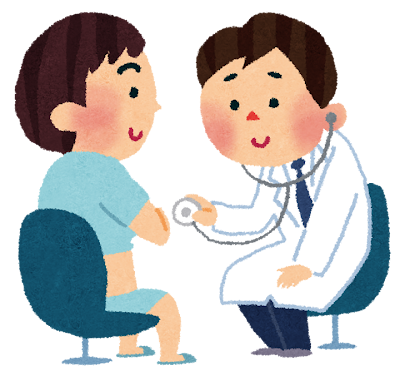

'image.png'

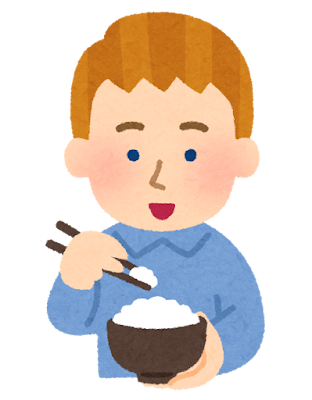

'image.png'

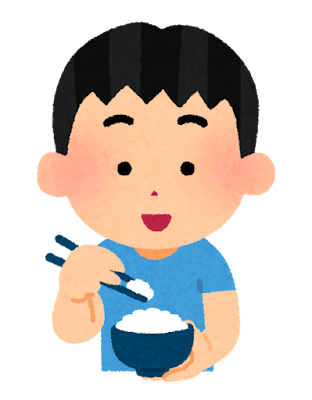

'image.gif'

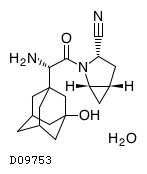

In [42]:
for slide in prs.slides:
    for shape in slide.shapes:
        if shape.shape_type == 13:                 # Picture
            name = shape.image.filename
            blob = shape.image.blob
            ext = Path(name).suffix.lstrip(".")
            display(name)
            display(Image(data=blob, format=ext))